In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import community

In [2]:
ls

drive/  sample_data/


In [3]:
cd ./drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
G = nx.Graph()

f = open('./data/lab/lab5/community_graph.txt')
for line in f:
  v1, v2 = map(int, line.split())
  G.add_edge(v1, v2)
f.close()

In [5]:
# 출력을 위해 노드별로 색깔을 지정해주는 작업
szCom1 = 8          # nodeColor: Red
szCom2 = 10         # nodeColor: Yellow
szCom3 = 12         # nodeColor: Blue
nodeColorList=[]
for i in range(szCom1+szCom2+szCom3):
    if i<szCom1:
        nodeColorList = nodeColorList + ['red']
    elif i<szCom1+szCom2:
        nodeColorList = nodeColorList + ['yellow']
    else:
        nodeColorList = nodeColorList + ['blue']

print(f"그래프의 노드의 개수는 {G.number_of_nodes()}, 엣지의 개수는 {G.number_of_edges()}개입니다.")

그래프의 노드의 개수는 30, 엣지의 개수는 90개입니다.


In [6]:
def GirvanNewmanAlgorithm(graph, nodeColorList):
  copyGraph = graph.copy()
  step = 0
  logModularityList = []
  maxModCom = []
  maxMod = -1
  maxStep = 0
  while len(copyGraph.edges())>0:
    recComList = sorted(nx.connected_components(copyGraph), key = len, reverse = True)
    recMod = community.modularity(graph, communities = recComList)
    if recMod>maxMod:
      maxModG = copyGraph.copy()
      maxMod = recMod
      maxModCom = []
      for j in range(len(recComList)):
        maxModCom += [recComList[j]]
      maxStep = step
    logModularityList += [recMod]

    step += 1
    bet = nx.edge_betweenness_centrality(copyGraph)
    maxEdge = max(bet, key = bet.get)
    copyGraph.remove_edge(maxEdge[0], maxEdge[1])
  return maxModG, maxMod, maxModCom, maxStep, logModularityList

In [7]:
'''
    maxModG             : 가장 큰 Modularity 값을 가지고 있을 때의 그래프
    maxMod              : 가장 큰 Modularity 값
    maxModCom           : 가장 큰 Modularity 값을 가졌을 때, 커뮤니티의 정보
    maxStep             : 가장 큰 Modularity 값을 가졌을 때, Step 값
    logModularityList   : 각 Step마다의 Modularity 값
'''
maxModG, maxM, maxModCom, maxStep, logModularityList = GirvanNewmanAlgorithm(G, nodeColorList)

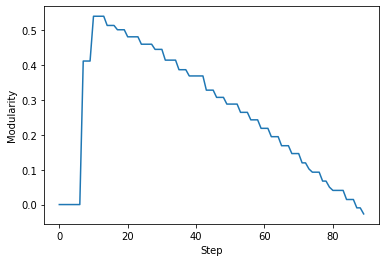

In [8]:
# 각 Step별로 Modularity 값 플롯
fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.plot(range(0,G.number_of_edges()), logModularityList)
plt.xlabel('Step')
plt.ylabel('Modularity')
plt.show()

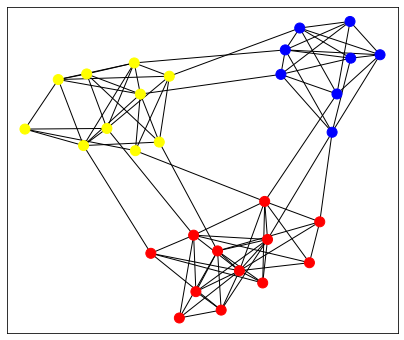

In [9]:
# 클러스터링이 진행된 그래프 출력
pos = nx.spring_layout(G)                           # 간선이 잘 보이게 layout을 결정
fig = plt.figure(figsize=(7, 6))
predictedNodeColorList = []                         # 예측한 커뮤니티에 따라서, 노드별의 색깔을 담은 리스트
for i in range(len(G.nodes)):                       # 각 노드 별로 인덱스에 맞추어 
    if i in maxModCom[0]:                           # 커뮤니티 별로 색깔을 지정해준다
        predictedNodeColorList = predictedNodeColorList + ['red']
    elif i in maxModCom[1]:
        predictedNodeColorList = predictedNodeColorList + ['yellow']
    elif i in maxModCom[2]:
        predictedNodeColorList = predictedNodeColorList + ['blue']
nx.draw_networkx_nodes(G, pos, node_color=predictedNodeColorList, node_size=100)
nx.draw_networkx_edges(G, pos)
plt.show()

In [10]:
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import kernighan_lin_bisection
from networkx.algorithms.community import _naive_greedy_modularity_communities
'''
    Karate Club Graph
    # of nodes :  34
    # of edges :  78
    Label : ['Mr.Hi', 'Officer']
'''
def plotResult(G, pos, com):
    '''
        Community가 주어진다면, 해당 커뮤니티별로 노드의 색깔을 달리하여 그래프를 출력한다.
    '''
    nodeColorList = [0] * G.number_of_nodes()

    colors = ['red','blue','green','purple']            # 최대 4개의 커뮤니티
    for i in range(len(com)):
        for node in com[i]:
            nodeColorList[node] = colors[i]
    nx.draw_networkx_nodes(G, pos, node_color=nodeColorList, node_size=100)
    nx.draw_networkx_edges(G, pos)
    plt.plot()

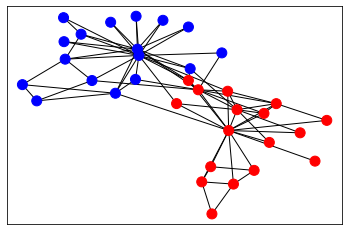

In [11]:
# 실제 그래프 노드의 라벨별로 색깔을 달리하여 출력
# 강의와 그래프의 형태가 다르게 나올 수 있습니다!
G = nx.karate_club_graph()                          # Karate Club Graph 데이터 불러오기
label = [G.nodes[i]["club"] for i in range(len(G.nodes))]
pos = nx.spring_layout(G)
nodeColorList = []
for i in range(len(G.nodes)):                       # 각 노드 별로 인덱스에 맞추어 
    if label[i] == 'Mr. Hi':                        # 커뮤니티 별로 색깔을 지정해준다
        nodeColorList = nodeColorList + ['red']
    elif label[i] == 'Officer':
        nodeColorList = nodeColorList + ['blue']

nx.draw_networkx_nodes(G,pos, node_color=nodeColorList, node_size=100)
nx.draw_networkx_edges(G, pos)
plt.show()

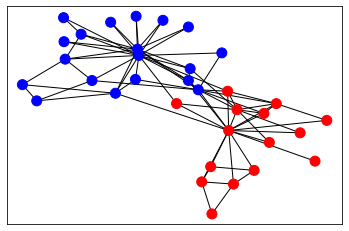

In [12]:
# Girvan-Newman의 예제
# 각 step마다의 community가 저장되어 있기때문에 커뮤니티가 2개로 나누어진 시점의 Community를 가져온다.
comKarateList  = list(girvan_newman(G))     
for com in comKarateList:
    if len(com) == 2:
        comKarate = com
plotResult(G, pos, comKarate)

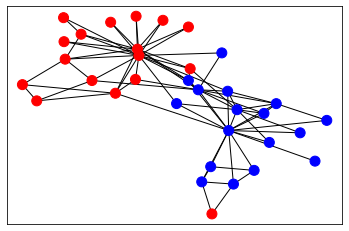

In [13]:
# kernighan_lin_bisection의 예제
comKarate  = list(kernighan_lin_bisection(G))
plotResult(G, pos, comKarate)